In [101]:
import imageio
import staintools
import matplotlib.pyplot as plt
from skimage.transform import rescale
from skimage.color import separate_stains
from skimage import img_as_float
import numpy as np


stain_normalizer = staintools.StainNormalizer(method='vahadane')

tff3 = imageio.imread('testtff3.png')


[[146 137 145]
 [172 145 123]]


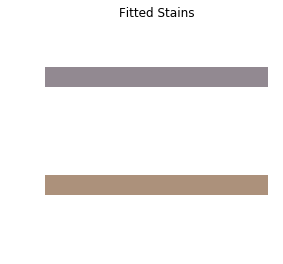

In [102]:
#tff3 = rescale(tff3,0.25)
stain_normalizer.fit(tff3)
staintools.plot_row_colors(stain_normalizer.stain_matrix_target_RGB, fig_size=4, title='Fitted Stains')
print(stain_normalizer.stain_matrix_target_RGB)
plt.show()


#deconv = separate_stains(tff3,)

In [103]:
from scipy import linalg

rgb_from_hdx = np.array([[0.650, 0.704, 0.286],
                         [0.268, 0.570, 0.776],
[0.0, 0.0, 0.0]])
rgb_from_hdx[2, :] = np.cross(rgb_from_hdx[0, :], rgb_from_hdx[1, :])
hdx_from_rgb = linalg.inv(rgb_from_hdx)


In [104]:
rgb_from_hdx

array([[ 0.65    ,  0.704   ,  0.286   ],
       [ 0.268   ,  0.57    ,  0.776   ],
       [ 0.383284, -0.427752,  0.181828]])

In [105]:
rgb_from_hdx = np.array([-np.log10(stain_normalizer.stain_matrix_target_RGB[0,:]),
                         -np.log10(stain_normalizer.stain_matrix_target_RGB[1,:]),
                         [0.0, 0.0, 0.0]])
rgb_from_hdx[2, :] = np.cross(rgb_from_hdx[0, :], rgb_from_hdx[1, :])
hdx_from_rgb = linalg.inv(rgb_from_hdx)
#hdx_from_rgb = rgb_from_hdx

In [106]:
hdx_from_rgb

array([[ 5.73422497, -5.86673155, -1.38209521],
       [ 1.41959199, -1.56693244,  2.06436445],
       [-7.60483731,  7.42056246, -0.65677797]])

In [107]:
deconv = separate_stains(tff3,hdx_from_rgb)

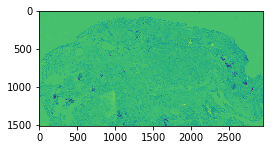

In [108]:
plt.imshow(deconv[:,:,0])

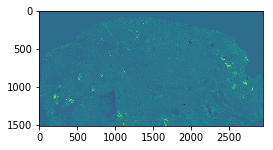

In [109]:
plt.imshow(deconv[:,:,1])

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

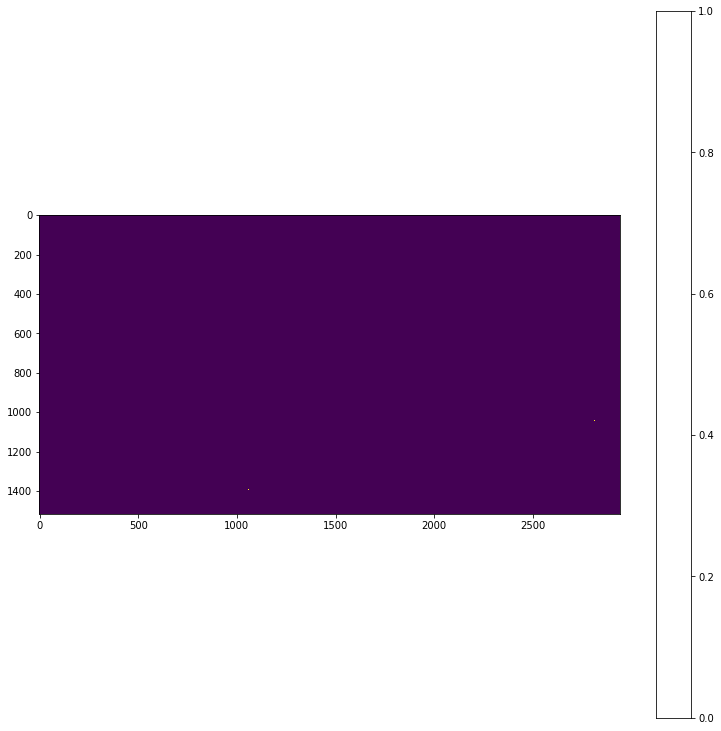

In [112]:
plt.figure(figsize=(13,13))
plt.imshow(deconv[:,:,1]>0.8)
plt.colorbar()